In [1]:
# wget --post-data 'The quick brown fox jumped over the lazy dog.' 'localhost:9000/?properties={"annotators":"tokenize,ssplit,pos","outputFormat":"json"}' -O -

In [2]:
# annotate [-h] [-i INPUT] [-o OUTPUT] [-f {json}]
#                 [-a ANNOTATORS [ANNOTATORS ...]] [-s] [-v] [-m MEMORY]
#                 [-p PROPS [PROPS ...]]

In [3]:
import os

os.environ["CORENLP_HOME"] = '/home/shreya\stanford-corenlp-full-2018-02-27'

from pycorenlp import StanfordCoreNLP

nlp = StanfordCoreNLP('http://localhost:9000/')

In [4]:
text = (
  'search for LinkedIn')

In [5]:
output = nlp.annotate( text, properties = { 
    'annotators' : 'tokenize, ssplit, pos, depparse, parse',
    'outputFormat': 'json'})

In [6]:
output['sentences'][0].keys()

dict_keys(['index', 'parse', 'basicDependencies', 'enhancedDependencies', 'enhancedPlusPlusDependencies', 'tokens'])

In [7]:
print(output['sentences'][0]['parse'])

(ROOT
  (NP
    (NP (NN search))
    (PP (IN for)
      (NP (NNP LinkedIn)))))


In [8]:
tokens = output['sentences'][0]['tokens']
lenDict = len(tokens)
for idx, token in enumerate(tokens):
    if(token['pos'] == 'NNP'):
        ans = token['originalText']
        while(idx + 1 < lenDict and tokens[idx + 1]['pos'] == 'NNP'):
            ans = ans + " " + token['originalText']

In [9]:
ans

'LinkedIn'

In [10]:
# output['sentences'][0]

In [11]:
depTreeStr = output['sentences'][0]['parse']
depTreeStr

'(ROOT\n  (NP\n    (NP (NN search))\n    (PP (IN for)\n      (NP (NNP LinkedIn)))))'

In [12]:
# import spacy
# from spacy.symbols import nsubj, VERB

# nlp = spacy.load('en_core_web_sm')
# doc = nlp('search for machine learning job openings at LinkedIn')

# for token in doc:
#     print(tok.text for toc in token.lefts)

# # print([token.text for token in doc.lefts])

In [13]:
import nltk
from nltk.tree import Tree
# from nltk.draw.tree import draw_trees

In [14]:
# dir(Tree)
# help(Tree.fromstring)

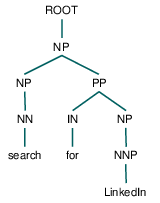

In [15]:
depTree = Tree.fromstring(depTreeStr)
depTree

In [16]:
dir(depTree)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_frozen_class',
 '_get_node',
 '_label',
 '_parse_error',
 '_pformat_flat',
 '_repr_png_',
 '_set_node',
 'append',
 'chomsky_normal_form',
 'clear',
 'collapse_unary',
 'convert',
 'copy',
 'count',
 'draw',
 'extend',
 'flatten',
 'freeze',
 'fromstring',
 'height',
 'index',
 'insert',
 'label',
 'leaf_treeposition',
 'leaves',
 'node',
 'pformat',
 'pformat_latex_qtree',
 'pop',
 'pos',
 'pprint',
 'pretty_print',
 'produ

In [17]:
# dir(depTree.subtrees())

In [18]:
sub = depTree.subtrees()

In [19]:
for tr in sub:
    subT = tr
    for s in subT:
        print(type(s))
        print(s)
    print("\n")

<class 'nltk.tree.Tree'>
(NP (NP (NN search)) (PP (IN for) (NP (NNP LinkedIn))))


<class 'nltk.tree.Tree'>
(NP (NN search))
<class 'nltk.tree.Tree'>
(PP (IN for) (NP (NNP LinkedIn)))


<class 'nltk.tree.Tree'>
(NN search)


<class 'str'>
search


<class 'nltk.tree.Tree'>
(IN for)
<class 'nltk.tree.Tree'>
(NP (NNP LinkedIn))


<class 'str'>
for


<class 'nltk.tree.Tree'>
(NNP LinkedIn)


<class 'str'>
LinkedIn


